# Data Analysis

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv(r'C:\Users\ASUS\Desktop\5th SEMI\ML proj\DATA SET\Clean_Dataset.csv')

In [12]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [13]:
data.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

<Axes: >

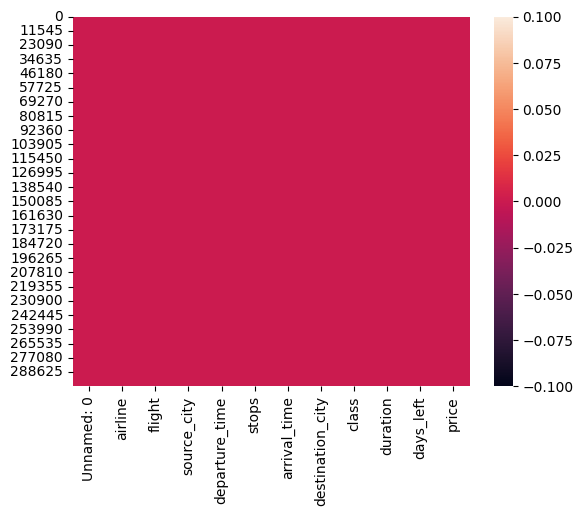

In [14]:
sns.heatmap(data=data.isnull())

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [16]:
data.shape

(300153, 12)

In [17]:
data.count()

Unnamed: 0          300153
airline             300153
flight              300153
source_city         300153
departure_time      300153
stops               300153
arrival_time        300153
destination_city    300153
class               300153
duration            300153
days_left           300153
price               300153
dtype: int64

In [18]:
data.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [19]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [20]:
data.isna().sum()     #data.isnull()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

There is no null values.

In [21]:
data.drop(columns = 'Unnamed: 0', inplace = True)

In [22]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [23]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

# Features

### Airline

In [24]:
data['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

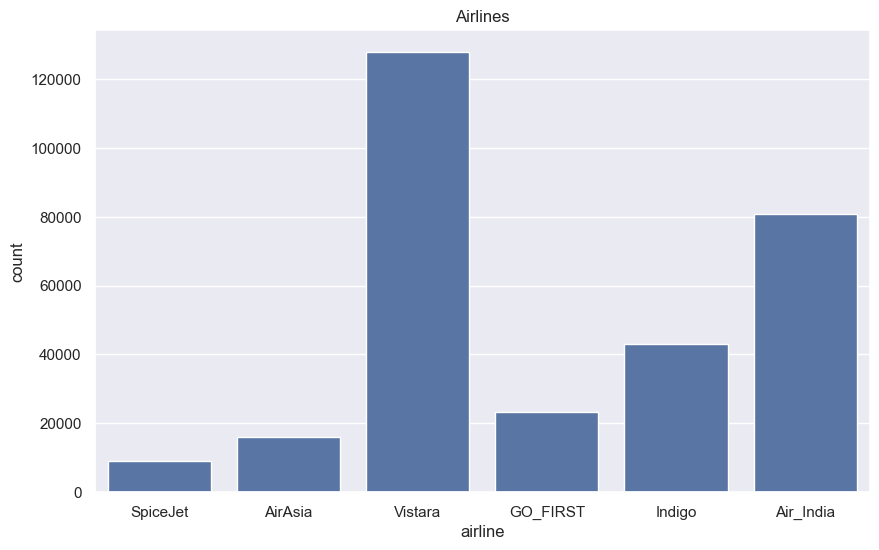

In [25]:
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(x='airline', data=data)
plt.title('Airlines')
plt.show()

Text(0.5, 1.0, 'Pie Chart of Airline')

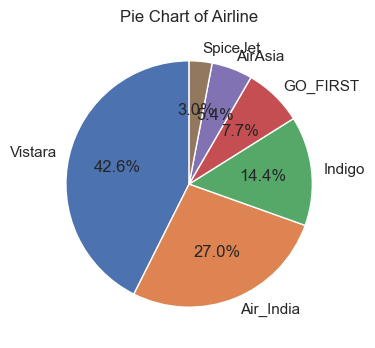

In [26]:
plt.figure(figsize=(8,4))
labels = data['airline'].value_counts().index.tolist()
plt.pie(data['airline'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Airline')

### Flight 

In [27]:
data['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

We are unable to plot this column due to the huge unique values.
As a flight name is similar to an ID, it is dropped from the dataframe and is not required for modeling.

In [28]:
data.drop(columns = 'flight', inplace = True)

In [29]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Source_city 

In [30]:
data['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

Text(0.5, 1.0, 'Source Cities')

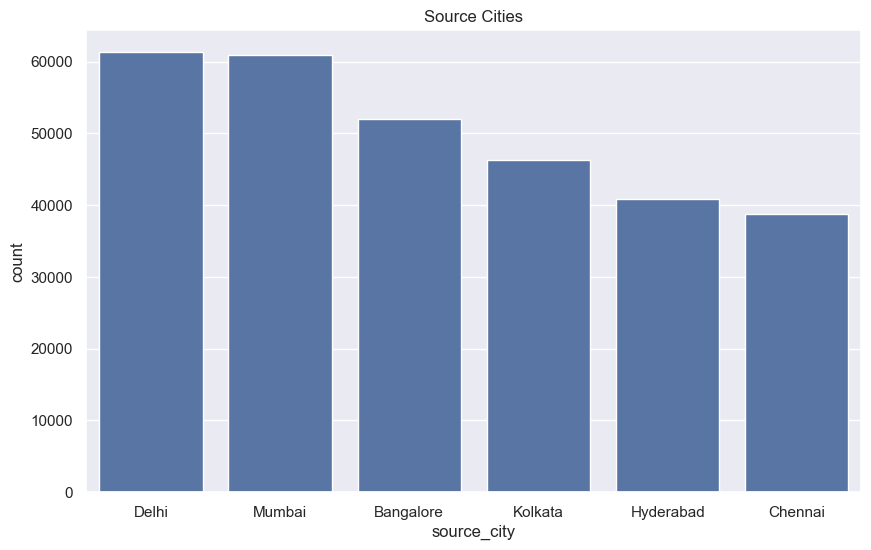

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='source_city', data=data)
plt.title('Source Cities')

Text(0.5, 1.0, 'Pie Chart of Source City')

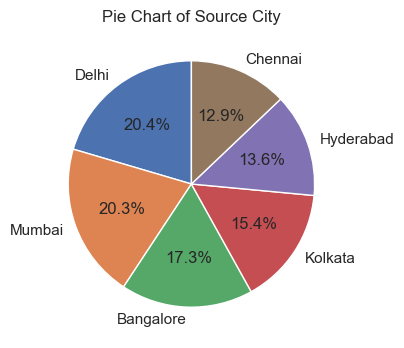

In [32]:
plt.figure(figsize=(8,4))
labels = data['source_city'].value_counts().index.tolist()
plt.pie(data['source_city'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Source City')

### Departure_time 

In [33]:
data['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

Text(0.5, 1.0, 'Departure Time')

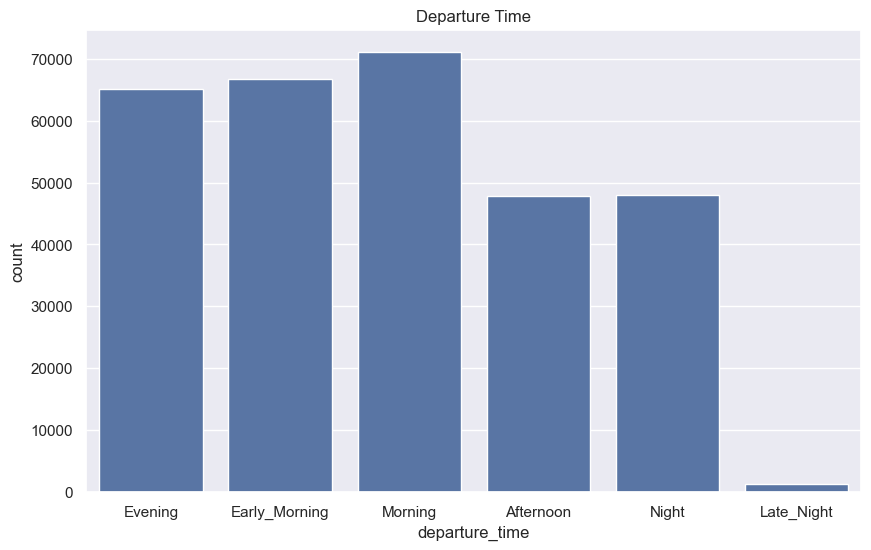

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='departure_time', data=data)
plt.title('Departure Time')

Text(0.5, 1.0, 'Pie Chart of Departure Time')

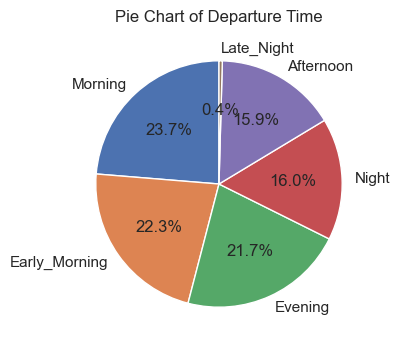

In [35]:
plt.figure(figsize=(8,4))
labels = data['departure_time'].value_counts().index.tolist()
plt.pie(data['departure_time'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Departure Time')

### Stops

In [36]:
data['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

Text(0.5, 1.0, 'Stops')

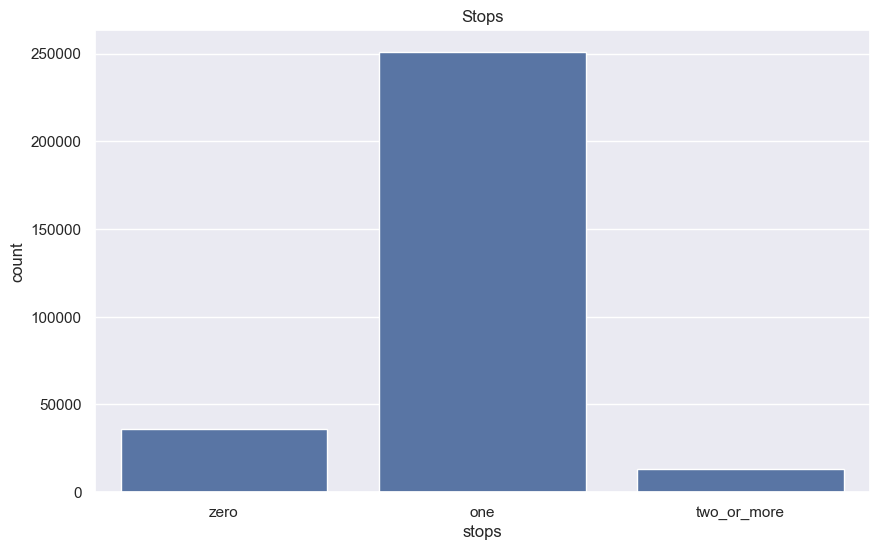

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='stops', data=data)
plt.title('Stops')

Text(0.5, 1.0, 'Pie Chart of Stops')

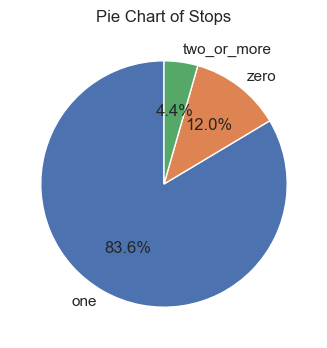

In [38]:
plt.figure(figsize=(8,4))
labels = data['stops'].value_counts().index.tolist()
plt.pie(data['stops'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Stops')

### Arrival_time

In [39]:
data['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

Text(0.5, 1.0, 'Arrival times')

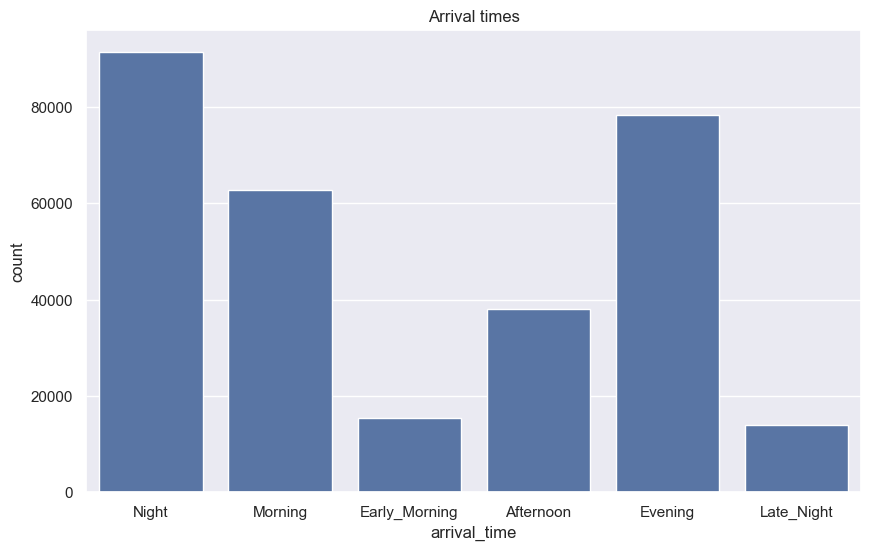

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='arrival_time', data=data)
plt.title('Arrival times')

Text(0.5, 1.0, 'Pie Chart of Arrival times')

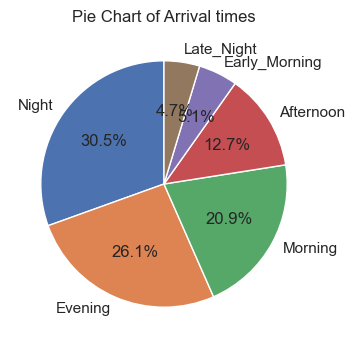

In [41]:
plt.figure(figsize=(8,4))
labels = data['arrival_time'].value_counts().index.tolist()
plt.pie(data['arrival_time'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Arrival times')

### Destination_city

In [42]:
data['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Destination City')

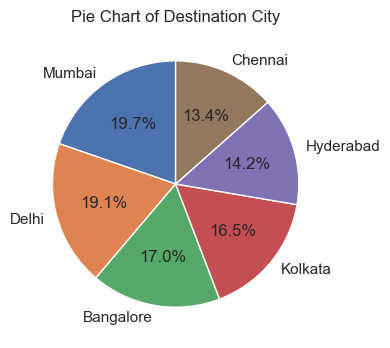

In [43]:
plt.figure(figsize=(8,4))
labels = data['destination_city'].value_counts().index.tolist()
plt.pie(data['destination_city'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Destination City')

### Class

In [44]:
data['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Flight Class')

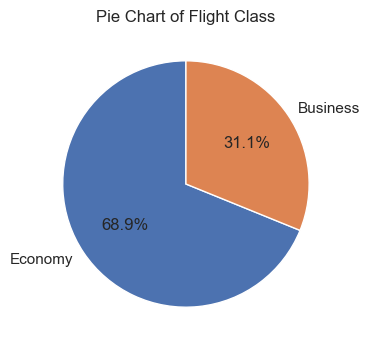

In [45]:
plt.figure(figsize=(8,4))
labels = data['class'].value_counts().index.tolist()
plt.pie(data['class'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Flight Class')

### Duration 

In [46]:
data['duration'].value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

### Days_left 

In [47]:
data['days_left'].value_counts()

days_left
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: count, dtype: int64

In [48]:
len(data['days_left'].value_counts())

49

### Encoding Categorical Features

In [49]:
data['airline'] = data.airline.replace(
    {
        'Vistara' : 1,
        'Air_India' : 2,
        'Indigo' : 3,
        'GO_FIRST' : 4,
        'AirAsia': 5,
        'SpiceJet' : 6  
    }
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2324\3382932303.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['airline'] = data.airline.replace(


In [50]:
data['source_city'] = data.source_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad'  : 5,
        'Chennai' : 6
    }
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2324\755468395.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['source_city'] = data.source_city.replace(


In [51]:
data['departure_time'] = data.departure_time.replace(
    {
        'Morning' : 1,
        'Early_Morning' : 2, 
        'Evening' : 3,
        'Night' : 4,
        'Afternoon' : 5, 
        'Late_Night' : 6
    }
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2324\4077997142.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['departure_time'] = data.departure_time.replace(


In [52]:
data['stops'] = data.stops.replace(
    {
        'one' : 1,
        'zero' : 2,
        'two_or_more' : 3
    }
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2324\2084959884.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['stops'] = data.stops.replace(


In [53]:
data['arrival_time'] = data.arrival_time.replace(
    {
        'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6
    }
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2324\3007022587.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['arrival_time'] = data.arrival_time.replace(


In [54]:
data['destination_city'] = data.destination_city.replace(
    {
        'Mumbai' : 1,
        'Delhi' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2324\3536963034.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['destination_city'] = data.destination_city.replace(


In [55]:
data['class'] = data['class'].replace(
    {
        'Economy' : 1,
        'Business' :2
    }
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2324\3417142512.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class'] = data['class'].replace(


In [56]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,6,1,3,2,1,1,1,2.17,1,5953
1,6,1,2,2,3,1,1,2.33,1,5953
2,5,1,2,2,5,1,1,2.17,1,5956
3,1,1,1,2,4,1,1,2.25,1,5955
4,1,1,1,2,3,1,1,2.33,1,5955


In [57]:
data.shape

(300153, 10)

In [58]:
X = data.drop(columns = 'price', axis = 1)
Y = data.price

### Linear Regression 

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predicted = regressor.predict(x_test)
accuracy = metrics.r2_score(y_test, predicted)
print("Accuracy: ", accuracy)

Accuracy:  0.8956079642098347


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import scale

Xs = scale(X)
Ys = scale(Y)
x_train, x_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.2, random_state=2)
sgdr = SGDRegressor(penalty='elasticnet', alpha=0.001, max_iter=100000, tol=1e-6
    , eta0=0.001)
sgdr.fit(x_train, y_train)
predicted = sgdr.predict(x_test)

score = sgdr.score(x_test, y_test)
print(score)

0.8955955400991501


### Decision Tree